In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score, auc
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn.model_selection import StratifiedKFold
import category_encoders
from catboost import Pool
from catboost.utils import get_roc_curve
from sklearn.metrics import auc


In [2]:
train_data = pd.read_csv('./train_dataset/train_public.csv')
test_public = pd.read_csv('./test_public.csv')
train_internet = pd.read_csv('./train_dataset/train_internet.csv')

In [3]:
train_data.shape

(10000, 39)

In [4]:
X_train = train_data.copy()
X_test = test_public.copy()

In [5]:
X_train = X_train.drop(['isDefault'], axis = 1)
X_train.shape

(10000, 38)

In [6]:
X_train['is_train'] = 1
X_test['is_train'] = 0

X_traintest = X_traintest = pd.concat([X_train, X_test], axis = 0)
X_traintest.shape

(15000, 39)

### 数据探索 

In [7]:
X_traintest.head(39)

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,employer_type,industry,work_year,...,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,is_train
0,1040418,240418,31818.181820,3,11.466,1174.91,C,政府机构,金融业,3 years,...,1,1.0,0.0,4.0,5.0,4.0,3,9927,0.0,1
1,1025197,225197,28000.000000,5,16.841,670.69,C,政府机构,金融业,10+ years,...,1,7.0,0.0,4.0,45.0,22.0,0,0,0.0,1
2,1009360,209360,17272.727270,3,8.900,603.32,A,政府机构,公共服务、社会组织,10+ years,...,1,6.0,0.0,6.0,28.0,19.0,0,0,0.0,1
3,1039708,239708,20000.000000,3,4.788,602.30,A,世界五百强,文化和体育业,6 years,...,1,5.0,0.0,10.0,15.0,9.0,0,0,0.0,1
4,1027483,227483,15272.727270,3,12.790,470.31,C,政府机构,信息传输、软件和信息技术服务业,< 1 year,...,1,10.0,0.0,6.0,15.0,4.0,0,0,0.0,1
5,1047529,247529,25454.545450,3,10.637,899.15,B,幼教与中小学校,信息传输、软件和信息技术服务业,10+ years,...,1,6.0,0.0,6.0,20.0,15.0,0,0,0.0,1
6,1030964,230964,9090.909091,5,15.741,234.30,C,高等教育机构,金融业,10+ years,...,1,4.0,0.0,9.0,25.0,6.0,0,0,0.0,1
7,1024822,224822,10288.636360,3,11.490,414.62,B,普通企业,制造业,2 years,...,1,4.0,0.0,0.0,9.0,9.0,0,0,0.0,1
8,1008720,208720,6818.181818,3,20.064,272.05,D,普通企业,金融业,NaN,...,1,6.0,0.0,2.0,34.0,22.0,0,0,0.0,1
9,1045305,245305,10800.000000,3,14.330,339.95,C,幼教与中小学校,住宿和餐饮业,4 years,...,1,3.0,0.0,15.0,6.0,6.0,0,0,0.0,1


In [8]:
X_traintest.columns

Index(['loan_id', 'user_id', 'total_loan', 'year_of_loan', 'interest',
       'monthly_payment', 'class', 'employer_type', 'industry', 'work_year',
       'house_exist', 'censor_status', 'issue_date', 'use', 'post_code',
       'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low',
       'scoring_high', 'known_outstanding_loan', 'known_dero',
       'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status',
       'app_type', 'earlies_credit_mon', 'title', 'policy_code', 'f0', 'f1',
       'f2', 'f3', 'f4', 'early_return', 'early_return_amount',
       'early_return_amount_3mon', 'is_train'],
      dtype='object')

In [9]:
X_traintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 4999
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   15000 non-null  int64  
 1   user_id                   15000 non-null  int64  
 2   total_loan                15000 non-null  float64
 3   year_of_loan              15000 non-null  int64  
 4   interest                  15000 non-null  float64
 5   monthly_payment           15000 non-null  float64
 6   class                     15000 non-null  object 
 7   employer_type             15000 non-null  object 
 8   industry                  15000 non-null  object 
 9   work_year                 14100 non-null  object 
 10  house_exist               15000 non-null  int64  
 11  censor_status             15000 non-null  int64  
 12  issue_date                15000 non-null  object 
 13  use                       15000 non-null  int64  
 14  post_co

In [10]:
# print(f'There are {X_traintest.isnull().any().sum()} columns in train dataset with missing values.')

In [11]:
# have_null_fea_dict = (X_traintest.isnull().sum()/len(X_traintest)).to_dict() 
# fea_null_moreThanThreshold = {} 
# for key,value in have_null_fea_dict.items(): 
#     if value > 0.4: 
#         fea_null_moreThanThreshold[key] = value
# fea_null_moreThanThreshold

In [12]:
# missing = X_traintest.isnull().sum()/len(X_traintest) 
# missing = missing[missing > 0] 
# missing.sort_values(inplace=True) 
# missing.plot.bar()

In [13]:
one_value_fea = [col for col in X_traintest.columns if X_traintest[col].nunique() <= 1]
print(one_value_fea)
print(f'There are {len(one_value_fea)} columns in train dataset with one unique value.') 

['policy_code']
There are 1 columns in train dataset with one unique value.


In [14]:
unimport_fea = ['loan_id', 'user_id']
for cat in unimport_fea:
    X_traintest = X_traintest.drop(cat, axis=1)

X_traintest = X_traintest.drop(one_value_fea, axis=1)

In [15]:
numerical_fea = list(X_traintest.select_dtypes(exclude=['object']).columns) 
category_fea = list(filter(lambda x: x not in numerical_fea,list(X_traintest.columns)))
print("numerical_fea:",numerical_fea)
print("category_fea:",category_fea)

numerical_fea: ['total_loan', 'year_of_loan', 'interest', 'monthly_payment', 'house_exist', 'censor_status', 'use', 'post_code', 'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low', 'scoring_high', 'known_outstanding_loan', 'known_dero', 'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status', 'app_type', 'title', 'f0', 'f1', 'f2', 'f3', 'f4', 'early_return', 'early_return_amount', 'early_return_amount_3mon', 'is_train']
category_fea: ['class', 'employer_type', 'industry', 'work_year', 'issue_date', 'earlies_credit_mon']


In [16]:
# def get_numerical_serial_fea(data,feas): 
#     numerical_serial_fea = [] 
#     numerical_noserial_fea = [] 
#     for fea in feas: 
#         temp = data[fea].nunique() 
#         if temp <= 10: 
#             numerical_noserial_fea.append(fea) 
#             continue 
#         numerical_serial_fea.append(fea) 
#     return numerical_serial_fea,numerical_noserial_fea 
# numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(X_traintest,numerical_fea)
# print("numerical_fea中的numerical_serial_fea:",numerical_serial_fea)
# print("numerical_fea中的numerical_noserial_fea:",numerical_noserial_fea)

### 特征工程 

#### work_year, class 

In [17]:
work_year_dict = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}



X_traintest['num_work_year'] = X_traintest['work_year'].map(work_year_dict)

In [18]:
class_dict = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
}


X_traintest['num_class'] = X_traintest['class'].map(class_dict)

#### issue_date, earlies_credit_mon

In [19]:
X_traintest['issue_date'] = pd.to_datetime(X_traintest['issue_date'])

X_traintest['issue_date_delta'] = (X_traintest['issue_date'] - X_traintest['issue_date'].min())  / np.timedelta64(1,'D')

In [20]:
X_traintest['earlies_credit_mon'] = pd.to_datetime(X_traintest['earlies_credit_mon'])

X_traintest['earlies_credit_mon_delta'] = (X_traintest['earlies_credit_mon'] - X_traintest['earlies_credit_mon'].min())  / np.timedelta64(1,'D')

#### employer_type, industry

In [21]:
from sklearn.preprocessing import LabelEncoder


lbl1 = LabelEncoder().fit(X_traintest['employer_type'])
X_traintest['num_employer_type'] = lbl1.transform(X_traintest['employer_type'])

lbl2 = LabelEncoder().fit(X_traintest['industry'])
X_traintest['num_industry'] = lbl2.transform(X_traintest['industry'])


In [22]:
X_traintest['num_industry']

0       13
1       13
2        3
3       10
4        2
        ..
4995     2
4996     8
4997     8
4998    10
4999     0
Name: num_industry, Length: 15000, dtype: int32

#### 交叉特征

In [23]:
X_traintest['pro'] = X_traintest['interest'].mul(X_traintest['year_of_loan'])

X_traintest['loan_year'] = X_traintest['total_loan']/X_traintest['year_of_loan']
X_traintest['early_ratio'] = X_traintest['early_return_amount']/X_traintest['total_loan']
X_traintest['early_times_ratio'] = X_traintest['early_return']/X_traintest['year_of_loan']
X_traintest['recircle_ratio'] = X_traintest['recircle_b']/X_traintest['total_loan']

X_traintest['recircle_amt'] = X_traintest['recircle_b'].mul(X_traintest['total_loan'])

In [24]:
drop_fea=['class', 'employer_type', 'industry', 'work_year', 'issue_date', 'earlies_credit_mon']

for cat in drop_fea:
    X_traintest = X_traintest.drop(cat, axis=1) 

In [25]:
numerical_fea = list(X_traintest.select_dtypes(exclude=['object']).columns) 
category_fea = list(filter(lambda x: x not in numerical_fea,list(X_traintest.columns)))
print("numerical_fea:",numerical_fea)
print("category_fea:",category_fea)

numerical_fea: ['total_loan', 'year_of_loan', 'interest', 'monthly_payment', 'house_exist', 'censor_status', 'use', 'post_code', 'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low', 'scoring_high', 'known_outstanding_loan', 'known_dero', 'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status', 'app_type', 'title', 'f0', 'f1', 'f2', 'f3', 'f4', 'early_return', 'early_return_amount', 'early_return_amount_3mon', 'is_train', 'num_work_year', 'num_class', 'issue_date_delta', 'earlies_credit_mon_delta', 'num_employer_type', 'num_industry', 'pro', 'loan_year', 'early_ratio', 'early_times_ratio', 'recircle_ratio', 'recircle_amt']
category_fea: []


### 模型 

In [26]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import catboost

In [27]:
all_fea = X_traintest.columns
X_train = X_traintest[X_traintest.is_train == 1][all_fea]
y_train = train_data['isDefault']

X_test = X_traintest[X_traintest.is_train == 0][all_fea]


In [28]:
def k_fold_serachParmaters(model,train_data, train_label, test_data):
    n_splits=5
    
    sk = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2020)
    pred_Test = np.zeros(len(test_data))
    
    auc_train, auc_val = 0, 0
    for tr_idx, val_idx in sk.split(train_data, train_label):
        x_train = train_data.iloc[tr_idx]
        y_train = train_label.iloc[tr_idx]
        x_val = train_data.iloc[val_idx]
        y_val = train_label.iloc[val_idx]

        model.fit(x_train, y_train, 
                  eval_set=[(x_val, y_val)], 
                  categorical_feature = category_fea,
                 early_stopping_rounds=100,
                 verbose=False)

        pred_Test += model.predict_proba(test_data)[:, 1]/n_splits

        pred = model.predict(x_val)
        auc_val += roc_auc_score(y_val,pred)/n_splits
        
        pred = model.predict(x_train)
        auc_train += roc_auc_score(y_train, pred)/n_splits
        
        
    return auc_val, pred_Test

In [29]:
import warnings
warnings.filterwarnings("ignore")

score_tta = None
score_list = []

tta_fold = 20
for i in range(tta_fold):
    clf = lgb.LGBMClassifier(objective='binary',
                             
                             boosting_type='gbdt',
                             tree_learner='serial',
                             num_leaves=32,
                             max_depth=6,
                             learning_rate=0.08,
                             n_estimators=10000,
                             subsample=0.9,
                             reg_alpha=0.4,
                             reg_lambda=0.4,
                             random_state=2021,
                             is_unbalance=True,
                             metric='auc',
                             verbose = -1
                            )

    score, test_pred = k_fold_serachParmaters(clf,
                           X_train,
                           y_train,
                           X_test,
                          )

    print('Fold：'+str(i+1)+'  Auc_Val:'+str(score))
    if score_tta is None:
        score_tta = test_pred/tta_fold
    else:
        score_tta += test_pred/tta_fold
    score_list.append(score)

Fold：1  Auc_Val:0.8203298421715517
Fold：2  Auc_Val:0.8203298421715517
Fold：3  Auc_Val:0.8203298421715517
Fold：4  Auc_Val:0.8203298421715517
Fold：5  Auc_Val:0.8203298421715517
Fold：6  Auc_Val:0.8203298421715517
Fold：7  Auc_Val:0.8203298421715517
Fold：8  Auc_Val:0.8203298421715517
Fold：9  Auc_Val:0.8203298421715517
Fold：10  Auc_Val:0.8203298421715517
Fold：11  Auc_Val:0.8203298421715517
Fold：12  Auc_Val:0.8203298421715517
Fold：13  Auc_Val:0.8203298421715517
Fold：14  Auc_Val:0.8203298421715517
Fold：15  Auc_Val:0.8203298421715517
Fold：16  Auc_Val:0.8203298421715517
Fold：17  Auc_Val:0.8203298421715517
Fold：18  Auc_Val:0.8203298421715517
Fold：19  Auc_Val:0.8203298421715517
Fold：20  Auc_Val:0.8203298421715517


In [30]:
submission = pd.read_csv('./submit_example.csv')
submission['isDefault'] =score_tta
submission.to_csv('./submit/lgbm3.csv', index=False)

<Figure size 864x432 with 0 Axes>

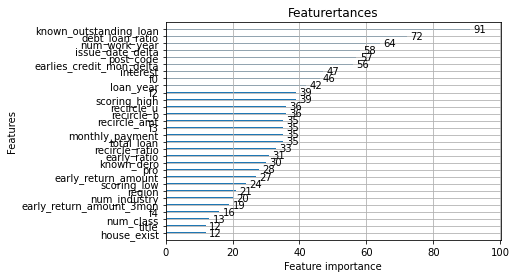

In [31]:
plt.figure(figsize=(12,6))
lgb.plot_importance(clf, max_num_features=30)
plt.title("Featurertances")
plt.show()

In [32]:
booster = clf.booster_
importance = booster.feature_importance(importance_type='split')
feature_name = booster.feature_name()
# for (feature_name,importance) in zip(feature_name,importance):
#     print (feature_name,importance) 
feature_importance = pd.DataFrame({'feature_name':feature_name,'importance':importance} )

### 输出 

In [33]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [34]:
feature_importance

,feature_name,importance
0,total_loan,35
1,year_of_loan,0
2,interest,47
3,monthly_payment,35
4,house_exist,12
5,censor_status,9
6,use,10
7,post_code,57
8,region,21
9,debt_loan_ratio,72
